In [9]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame,TimeSeriesPredictor
# import matplotlib.pyplot as plt

def load_and_predict(item_id):
    # 모델 로드
    predictor = TimeSeriesPredictor.load(r'AutogluonModels\ag-20240716_004738')
    
    file_path="./train_data_time.csv"
    df = pd.read_csv(file_path)
    # DataFrame으로 변환
    df = TimeSeriesDataFrame.from_data_frame(
        df,
        id_column="item_id",
        timestamp_column="timestamp"
    )
    # 예측 수행
    predictions = predictor.predict(df)
    # timestamp와 mean만 추출
    predictions = predictions.loc[item_id, ['mean']].reset_index()
    # predictor.plot(df, predictions, quantile_levels=[0.1, 0.9], max_history_length=200, max_num_item_ids=4)
    return predictions

def plot_predictions(predictions, start_date, periods, freq='D', item_id='Y08'):
    # 예측 결과에서 단일 아이템 선택
    pred_item = predictions.loc[item_id]

    # 예측 결과를 그래프로 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(pd.date_range(start=start_date, periods=periods, freq=freq), pred_item.values, label='Predictions', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.title(f'Predictions over Time for Item {item_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# 모델 경로와 예측할 기간 설정
model_path = 'models/merged_data_gm'  # 실제 모델 경로로 변경
start_date = '2024-06-01'
periods = 28
item_id='D02'
# 예측 수행
predictions = load_and_predict(item_id)
print(predictions)

# 예측 결과를 그래프로 시각화
# plot_predictions(predictions, start_date, periods)


data with frequency 'None' has been resampled to frequency 'D'.


     timestamp          mean
0   2024-05-01  2.436889e+06
1   2024-05-02  2.211979e+06
2   2024-05-03  2.350561e+06
3   2024-05-04  2.207119e+06
4   2024-05-05  1.969409e+06
..         ...           ...
115 2024-08-24  2.335028e+06
116 2024-08-25  1.855982e+06
117 2024-08-26  2.344232e+06
118 2024-08-27  2.301966e+06
119 2024-08-28  2.291737e+06

[120 rows x 2 columns]


In [6]:
def plot_predictions(predictions):
    # 예측 결과를 그래프로 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(predictions['timestamp'], predictions['mean'], label='Predictions', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.title('Predictions over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
plot_predictions(predictions)

NameError: name 'plt' is not defined

In [76]:
predictor.plot(test_data, predictions, quantile_levels=[0.1, 0.9], max_history_length=200, max_num_item_ids=4)

NameError: name 'predictor' is not defined

In [88]:
predictor = TimeSeriesPredictor.load(r'AutogluonModels\ag-20240711_112932')

In [89]:
data = {
        "item_id": ['D05'] * periods,
        "timestamp": pd.date_range(start='2024-07-01', periods=28, freq='D'),
        "amt": [0] * periods  # 실제 값은 필요 없음, 예측을 위한 구조만 필요
}

In [91]:
df = pd.DataFrame(data)
df = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp"
)

In [94]:
predictions = predictor.predict(df)
predictions.head()

mean       0.1       0.2       0.3       0.4  \
item_id timestamp                                                      
D05     2024-07-29  0.000061 -0.000562 -0.000355 -0.000273 -0.000154   
        2024-07-30  0.000080 -0.000549 -0.000364 -0.000225 -0.000121   
        2024-07-31  0.000060 -0.000545 -0.000382 -0.000227 -0.000123   
        2024-08-01  0.000101 -0.000237 -0.000172 -0.000128  0.000009   
        2024-08-02  0.000037 -0.000230 -0.000174 -0.000131 -0.000039   

                         0.5       0.6       0.7       0.8       0.9  
item_id timestamp                                                     
D05     2024-07-29  0.000061  0.000093  0.000267  0.000433  0.001059  
        2024-07-30  0.000080  0.000162  0.000352  0.000507  0.001126  
        2024-07-31  0.000060  0.000155  0.000361  0.000497  0.001101  
        2024-08-01  0.000101  0.000072  0.000145  0.000136  0.000406  
        2024-08-02  0.000037  0.000056  0.000063  0.000157  0.000460

In [11]:
import pandas as pd
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

def load_and_predict(model_name, item_id):
    # 모델 경로 설정
    model_paths = {
        '광명시': 'models/merged_data_gm',
        '시흥시': 'models2/merged_data_sh',
        '수원시': 'models/merged_data_sw',
        '안양시': 'models/merged_data_yy',
        '화성시': 'models2/merged_data_hs'
    }
    
    if model_name not in model_paths:
        raise ValueError("Invalid model name provided.")
    
    model_path = model_paths[model_name]
    
    # 모델 로드
    predictor = TimeSeriesPredictor.load(model_path)
    
    # 데이터 로드 및 변환
    file_path = "./train_data_time.csv"
    df = pd.read_csv(file_path)
    df = TimeSeriesDataFrame.from_data_frame(
        df,
        id_column="item_id",
        timestamp_column="timestamp"
    )
    
    # 예측 수행
    predictions = predictor.predict(df)
    predictor.plot(df, predictions, quantile_levels=[0.1, 0.9], max_history_length=200, max_num_item_ids=4)
    # 2024-07-01부터 끝까지의 결과 필터링
    predictions = predictions.loc[item_id, ['mean']].reset_index()
    predictions = predictions[predictions['timestamp'] >= '2024-07-01']
    
    return predictions

# 사용 예제
model_name = '시흥시'  # 사용자가 입력하는 모델 이름
item_id = 'D07'  # 예측할 item_id
predictions = load_and_predict(model_name, item_id)
# print(predictions)
# 예측 결과를 JSON 형식으로 변환 및 출력
predictions_json = predictions.to_json(orient='records', date_format='iso')
print(predictions_json)

data with frequency 'None' has been resampled to frequency 'D'.
data with frequency 'None' has been resampled to frequency 'D'.


[{"timestamp":"2024-07-01T00:00:00.000","mean":4362107.4197242167},{"timestamp":"2024-07-02T00:00:00.000","mean":3302874.6886007208},{"timestamp":"2024-07-03T00:00:00.000","mean":3352822.7447393565},{"timestamp":"2024-07-04T00:00:00.000","mean":3207130.5848395196},{"timestamp":"2024-07-05T00:00:00.000","mean":3955971.983404099},{"timestamp":"2024-07-06T00:00:00.000","mean":5638443.888060458},{"timestamp":"2024-07-07T00:00:00.000","mean":5072021.0799609069},{"timestamp":"2024-07-08T00:00:00.000","mean":4356741.953348781},{"timestamp":"2024-07-09T00:00:00.000","mean":3301689.2684916765},{"timestamp":"2024-07-10T00:00:00.000","mean":3353565.9946990982},{"timestamp":"2024-07-11T00:00:00.000","mean":3203440.741079194},{"timestamp":"2024-07-12T00:00:00.000","mean":3945739.6054320331},{"timestamp":"2024-07-13T00:00:00.000","mean":5640301.4662576113},{"timestamp":"2024-07-14T00:00:00.000","mean":5068084.5204578433},{"timestamp":"2024-07-15T00:00:00.000","mean":4358050.9242837671},{"timestamp":

In [16]:
file_path = "./train_data_time.csv"
df = pd.read_csv(file_path)
df  = df[df['timestamp'] >='2024-04-01']

data with frequency 'None' has been resampled to frequency 'D'.
data with frequency 'None' has been resampled to frequency 'D'.


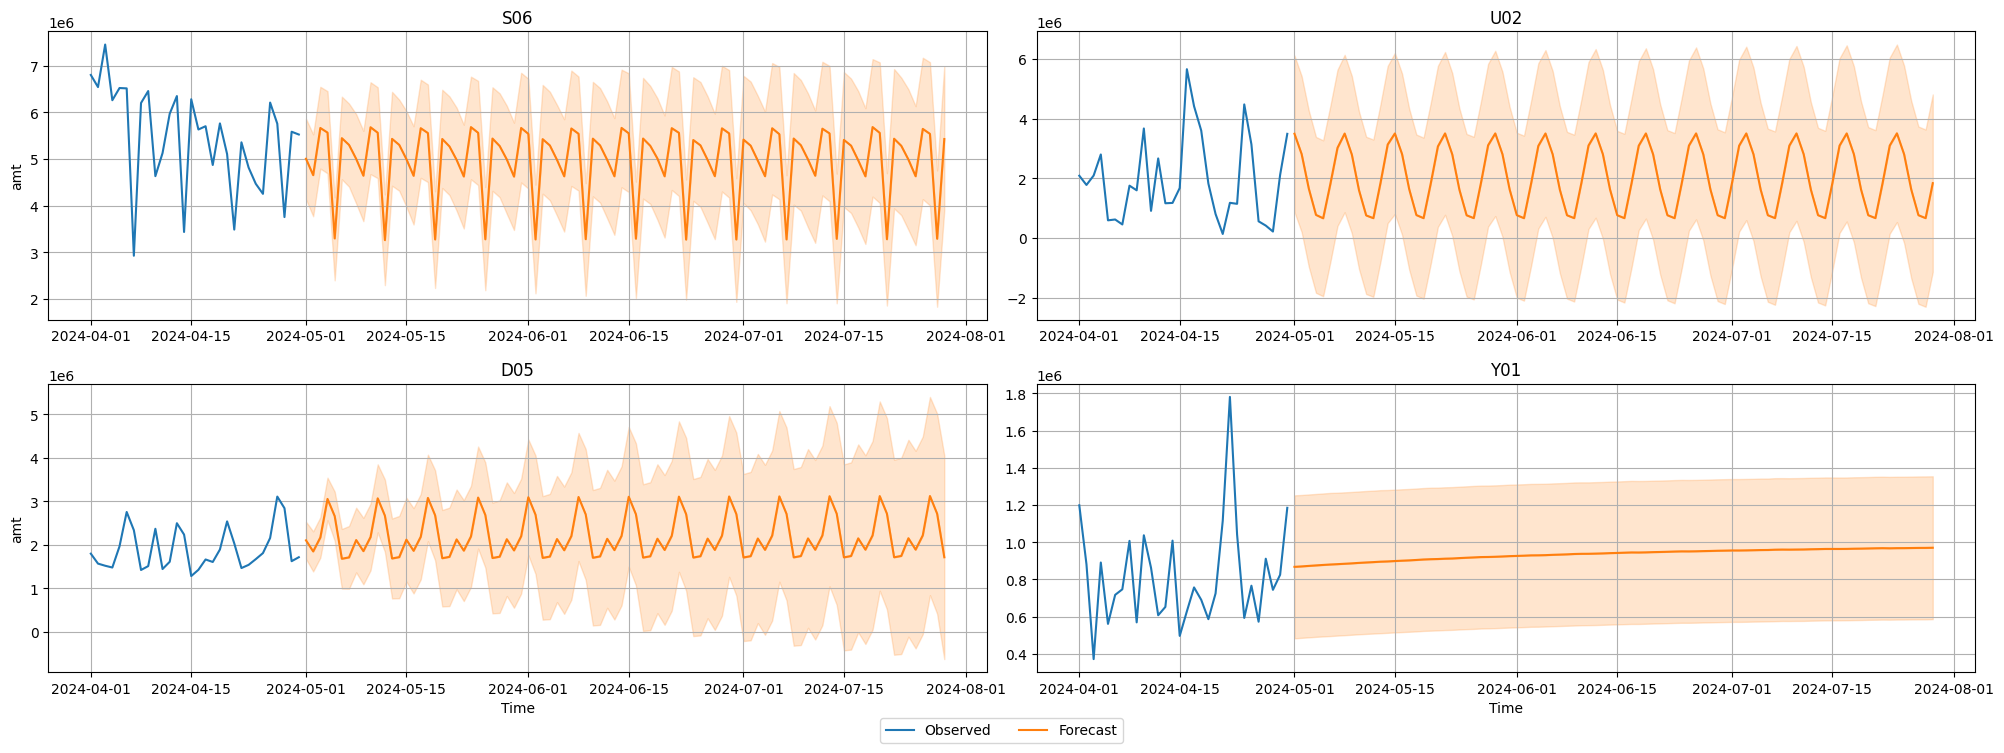

In [22]:
import matplotlib.pyplot as plt
predictor = TimeSeriesPredictor.load(r'models2/merged_data_sh')
df = TimeSeriesDataFrame.from_data_frame(
        df,
        id_column="item_id",
        timestamp_column="timestamp"
)
    
# 예측 수행
predictions = predictor.predict(df)
predictor.plot(df, predictions, quantile_levels=[0.1, 0.9], max_history_length=200, max_num_item_ids=4)
plt.show()
# 2024-07-01부터 끝까지의 결과 필터링
predictions = predictions.loc[item_id, ['mean']].reset_index()
predictions = predictions[predictions['timestamp'] >= '2024-07-01']

In [4]:
import pandas as pd
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

def load_and_predict(model_name, item_id):
    # 모델 경로 설정
    model_paths = {
        '광명시': 'models/merged_data_gm',
        '시흥시': 'models/merged_data_sh',
        '수원시': 'models/merged_data_sw',
        '안양시': 'models/merged_data_yy',
        '화성시': 'models/merged_data_hs'
    }
    
    if model_name not in model_paths:
        raise ValueError("Invalid model name provided.")
    
    model_path = model_paths[model_name]
    model_path = r"ag-20240716-004738"
    # 모델 로드
    predictor = TimeSeriesPredictor.load(model_path)
    
    # 데이터 로드 및 변환
    file_path = "./train_data_time.csv"
    df = pd.read_csv(file_path)
    df = TimeSeriesDataFrame.from_data_frame(
        df,
        id_column="item_id",
        timestamp_column="timestamp"
    )
    
    # 예측 수행
    predictions = predictor.predict(df)
    predictor.plot(df, predictions, quantile_levels=[0.1, 0.9], max_history_length=200, max_num_item_ids=4)
    # 2024-07-01부터 끝까지의 결과 필터링
    predictions = predictions.loc[item_id, ['mean']].reset_index()
    predictions = predictions[predictions['timestamp'] >= '2024-07-01']
    return predictions

# 사용 예제
model_name = '화성시'  # 사용자가 입력하는 모델 이름
item_id = 'D01'  # 예측할 item_id
predictions = load_and_predict(model_name, item_id)
# print(predictions)
# 예측 결과를 JSON 형식으로 변환 및 출력
predictions_json = predictions.to_json(orient='records', date_format='iso')
print(predictions_json)

This means that the predictor was fit in an AutoGluon version `<=0.7.0`.

############################## WARNING ##############################
	Predictor Version: Unknown (Likely <=0.7.0)
	Current Version:   1.1.1
############################## WARNING ##############################



AssertionError: Predictor was created on version Unknown (Likely <=0.7.0) but is being loaded with version 1.1.1. Please ensure the versions match to avoid instability. While it is NOT recommended, this error can be bypassed by specifying `require_version_match=False`. Exceptions encountered after setting `require_version_match=False` may be very cryptic, and in most cases mean that the predictor is fully incompatible with the installed version.

In [1]:
import pandas as pd
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

def load_and_predict(item_id):
    # 모델 경로 설정
    # model_paths = {
    #     '광명시': 'models/merged_data_gm',
    #     '시흥시': 'models/merged_data_sh',
    #     '수원시': 'models/merged_data_sw',
    #     '안양시': 'models/merged_data_yy',
    #     '화성시': 'models/merged_data_hs'
    # }
    
    # if model_name not in model_paths:
    #     raise ValueError("Invalid model name provided.")
    
    # model_path = model_paths[model_name]
    model_path = r"ag-20240716-004738"
    # 모델 로드
    predictor = TimeSeriesPredictor.load(model_path)
    
    # 데이터 로드 및 변환
    file_path = "./train_data_time.csv"
    df = pd.read_csv(file_path)
    df = TimeSeriesDataFrame.from_data_frame(
        df,
        id_column="item_id",
        timestamp_column="timestamp"
    )
    
    # 예측 수행
    predictions = predictor.predict(df)
    predictor.plot(df, predictions, quantile_levels=[0.1, 0.9], max_history_length=200, max_num_item_ids=4)
    # 2024-07-01부터 끝까지의 결과 필터링
    predictions = predictions.loc[item_id, ['mean']].reset_index()
    predictions = predictions[predictions['timestamp'] >= '2024-07-01']
    return predictions

# 사용 예제
model_name = '광명시'  # 사용자가 입력하는 모델 이름
item_id = 'D01'  # 예측할 item_id
predictions = load_and_predict(item_id)
# print(predictions)
# 예측 결과를 JSON 형식으로 변환 및 출력
predictions_json = predictions.to_json(orient='records', date_format='iso')
print(predictions_json)

This means that the predictor was fit in an AutoGluon version `<=0.7.0`.

############################## WARNING ##############################
	Predictor Version: Unknown (Likely <=0.7.0)
	Current Version:   1.1.1
############################## WARNING ##############################



AssertionError: Predictor was created on version Unknown (Likely <=0.7.0) but is being loaded with version 1.1.1. Please ensure the versions match to avoid instability. While it is NOT recommended, this error can be bypassed by specifying `require_version_match=False`. Exceptions encountered after setting `require_version_match=False` may be very cryptic, and in most cases mean that the predictor is fully incompatible with the installed version.